In [7]:
%pip install wbdata
import wbdata
import pandas as pd
import numpy as np
%pip install cufflinks
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [53]:
wbdata.get_country("KOR")

SOURCE = 40 # "Population estimates and projections
indicators = wbdata.get_indicator(source=SOURCE)
indicators

variable_labels = {"SP.POP.TOTL":"KOR Population", "SP.POP.3539.FE": "Population ages 35-39, female", "SP.POP.3034.FE": "Population ages 30-34, female", "SP.POP.2529.FE": "Population ages 25-29, female",
                   "SP.DYN.TFRT.IN": "Fertility rate", "SP.POP.3539.MA": "Population ages 35-39, male", "SP.POP.3034.MA": "Population ages 30-34, male", "SP.POP.2529.MA": "Population ages 25-29, male", "SP.POP.2024.MA": "Population ages 20-24, male", 
                   "SP.POP.GROW": "Population growth (annual %)", "SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)","SP.DYN.CBRT.IN": "Birth rate, crude (per 1,000 people)"}       
KOR = wbdata.get_dataframe(variable_labels, country="KOR")
KOR.head()

birth_mortality = KOR[['Birth rate, crude (per 1,000 people)', 'Mortality rate, under-5 (per 1,000 live births)']].sort_index()
birth_mortality['Birth rate, crude (per 1,000 people)']

date
1960    41.930
1961    40.983
1962    39.657
1963    38.083
1964    36.448
         ...  
2018     6.400
2019     5.900
2020     5.300
2021     5.100
2022       NaN
Name: Birth rate, crude (per 1,000 people), Length: 63, dtype: float64

In [57]:
SOURCE = 15 # "World Development Indicators
indicators = wbdata.get_indicator(source=SOURCE)
indicators

id             name
-------------  ----------------------------------------------------------------
CORENS         Core CPI,not seas.adj,,,
CORESA         Core CPI,seas.adj,,,
CPTOTNSXN      CPI Price, nominal
CPTOTSAXMZGY   CPI Price, % y-o-y, median weighted, seas. adj.
CPTOTSAXN      CPI Price, nominal, seas. adj.
CPTOTSAXNZGY   CPI Price, % y-o-y, nominal, seas. adj.
DMGSRMRCHNSCD  Imports Merchandise, Customs, current US$, millions
DMGSRMRCHNSKD  Imports Merchandise, Customs, constant US$, millions
DMGSRMRCHNSXD  Imports Merchandise, Customs, Price, US$
DMGSRMRCHSACD  Imports Merchandise, Customs, current US$, millions, seas. adj.
DMGSRMRCHSAKD  Imports Merchandise, Customs, constant US$, millions, seas. adj.
DMGSRMRCHSAXD  Imports Merchandise, Customs, Price, US$, seas. adj.
DPANUSLCU      Official exchange rate, LCU per USD, period average
DPANUSSPB      Exchange rate, new LCU per USD extended backward, period average
DPANUSSPF      Exchange rate, old LCU per USD extended forwar

In [62]:
variablelabels = {"NY.GDP.PCAP.CD":"GDP per capita (current US$)", "NY.GDP.PCAP.KD.ZG": "GDP per capita growth (annual %)"}

KORECON = wbdata.get_dataframe(variablelabels, country="KOR")

# Date index is of type string; change to integers
KORECON.index = KORECON.index.astype(int)

# Print a few years' data
KORECON=KORECON.sort_index()

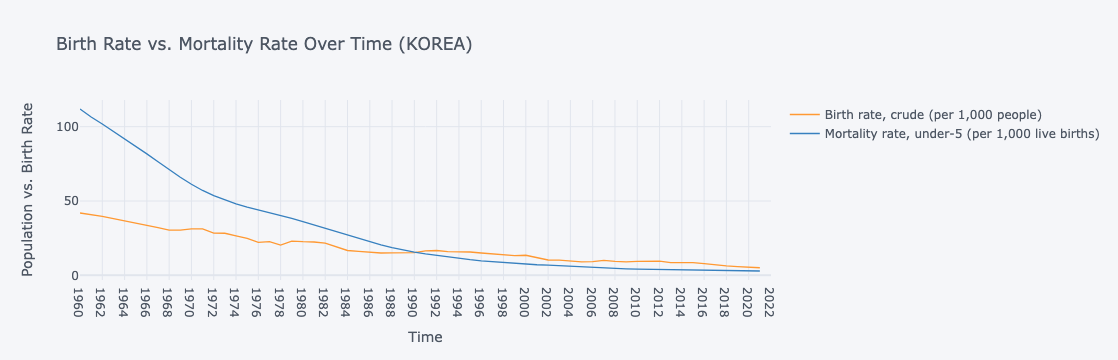

In [47]:
birth_mortality.iplot(title="Birth Rate vs. Mortality Rate Over Time (KOREA)",xTitle='Time',yTitle='Population vs. Birth Rate')

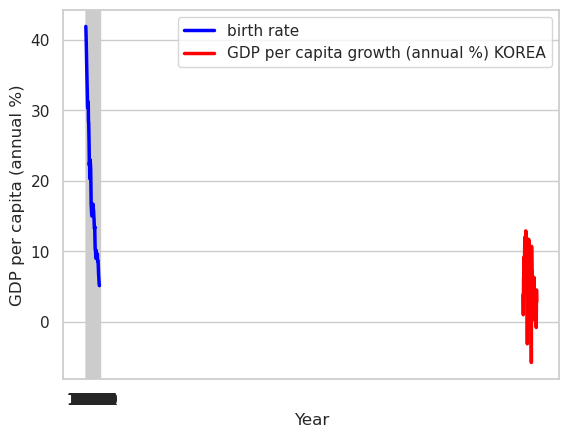

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.lineplot(data=birth_mortality, x='date', y ='Birth rate, crude (per 1,000 people)', 
             label = 'birth rate', color='blue', linewidth=2.5, ax = ax)
sns.lineplot(data=KORECON, x='date', y='GDP per capita growth (annual %)',
            label='GDP per capita growth (annual %) KOREA', color = 'red', linewidth = 2.5, ax=ax)
#plt.axvline(x=1960)
#plt.axvline(x=2022)
ax.set(xlabel='Year', ylabel='GDP per capita (annual %)');